# 1. Data Preparation:

1. Data Preparation:

    Hint 1: Use np.random.uniform(low, high, size) to generate the temperature data.

    Hint 2: Create a DataFrame using pd.DataFrame(data, index, columns) with appropriate index and columns.

    Use NumPy to generate a synthetic dataset representing average monthly temperatures (in degrees Celsius) for 12 months across 10 different cities. The temperatures should range from -5 to 35 degrees.
    Convert this NumPy array into a Pandas DataFrame, adding city names as index and months as columns.

2. Data Analysis:

    Hint 1: Calculate the annual average temperature using DataFrame.mean(axis).

    Hint 2: Find the city with the highest and lowest average temperature using idxmax() and idxmin() methods.

    Calculate the annual average temperature for each city.
    Identify the city with the highest and lowest average temperature for the year.


In [25]:
# a. Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from matplotlib.ticker import FuncFormatter  # Import manquant


  Hint 1: Use np.random.uniform(low, high, size) to generate the temperature data.

In [26]:
#1. Data Preparation
# Generate city names
cities = ['New York', 'London', 'Tokyo', 'Sydney', 'Moscow', 
          'Rio de Janeiro', 'Cairo', 'Singapore', 'Toronto', 'Berlin']

# Generate months as column names
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

Hint 2: Create a DataFrame using pd.DataFrame(data, index, columns) with appropriate index and columns.

Use NumPy to generate a synthetic dataset representing average monthly temperatures (in degrees Celsius) for 12 months across 10 different cities. The temperatures should range from -5 to 35 degrees.


In [27]:
# For reproducibility
np.random.seed(0)

temperatures = np.random.uniform(np.array([
    np.random.uniform(-3, 5, 12),      # New York
    np.random.uniform(0, 8, 12),       # London
    np.random.uniform(5, 25, 12),      # Tokyo
    np.random.uniform(10, 25, 12),     # Sydney
    np.random.uniform(-5, 20, 12),     # Moscow 
    np.random.uniform(20, 35, 12),     # Rio
    np.random.uniform(10, 30, 12),     # Cairo 
    np.random.uniform(25, 32, 12),     # Singapore
    np.random.uniform(-5, 10, 12),     # Toronto
    np.random.uniform(0, 15, 12)       # Berlin
]))  # 10 cities, 12 months

#

In [28]:
# Crée un tableau avec nos données de température
temp_df = pd.DataFrame(temperatures, index=cities, columns=months)

# Arrondit les températures à 1 chiffre après la virgule
temp_df = temp_df.round(1)

# Affiche les premières lignes
print("Monthly Temperature Data (℃):")
display(temp_df.head())

Monthly Temperature Data (℃):


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
New York,1.1,1.9,1.0,1.1,0.6,1.5,0.5,3.2,2.3,0.3,1.9,1.1
London,4.1,5.5,0.8,0.9,0.6,3.0,2.8,4.4,1.7,4.4,2.5,1.6
Tokyo,2.2,6.0,7.2,2.8,5.1,1.0,8.9,3.6,12.0,6.9,4.8,3.5
Sydney,4.5,8.9,14.7,18.9,5.4,9.5,6.4,2.3,1.5,3.7,13.0,8.0
Moscow,1.5,3.6,5.0,5.7,16.0,-2.4,0.8,-0.5,7.8,1.0,2.7,1.1


In [29]:
# Create DataFrame
temp_df = pd.DataFrame(temperatures, index=cities, columns=months)

# Round temperatures to 1 decimal place for readability
temp_df = temp_df.round(1)

# Display the first few rows
print("Monthly Temperature Data (℃):")
display(temp_df.head())




Monthly Temperature Data (℃):


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
New York,1.1,1.9,1.0,1.1,0.6,1.5,0.5,3.2,2.3,0.3,1.9,1.1
London,4.1,5.5,0.8,0.9,0.6,3.0,2.8,4.4,1.7,4.4,2.5,1.6
Tokyo,2.2,6.0,7.2,2.8,5.1,1.0,8.9,3.6,12.0,6.9,4.8,3.5
Sydney,4.5,8.9,14.7,18.9,5.4,9.5,6.4,2.3,1.5,3.7,13.0,8.0
Moscow,1.5,3.6,5.0,5.7,16.0,-2.4,0.8,-0.5,7.8,1.0,2.7,1.1


2. Data Analysis:

    Hint 1: Calculate the annual average temperature using DataFrame.mean(axis).

  Hint 1: Calculate the annual average temperature using DataFrame.mean(axis).

In [30]:
# Calculate annual average temperature for each city
annual_avg = temp_df.mean(axis=1).round(1)
annual_avg.name = 'Annual Avg'

 Hint 2: Find the city with the highest and lowest average temperature using idxmax() and idxmin() methods.

    Calculate the annual average temperature for each city.
    Identify the city with the highest and lowest average temperature for the year.

In [31]:
# Find city with highest and lowest average temperature
hottest_city = annual_avg.idxmax()
coldest_city = annual_avg.idxmin()

# Display results
print("\nAnnual Average Temperatures:")
display(annual_avg)

print(f"\nCity with highest average temperature: {hottest_city} ({annual_avg[hottest_city]}℃)")
print(f"City with lowest average temperature: {coldest_city} ({annual_avg[coldest_city]}℃)")


Annual Average Temperatures:


New York           1.4
London             2.7
Tokyo              5.3
Sydney             8.1
Moscow             3.5
Rio de Janeiro    13.6
Cairo             10.7
Singapore         15.5
Toronto            1.7
Berlin             6.1
Name: Annual Avg, dtype: float64


City with highest average temperature: Singapore (15.5℃)
City with lowest average temperature: New York (1.4℃)


3. Data Visualization:

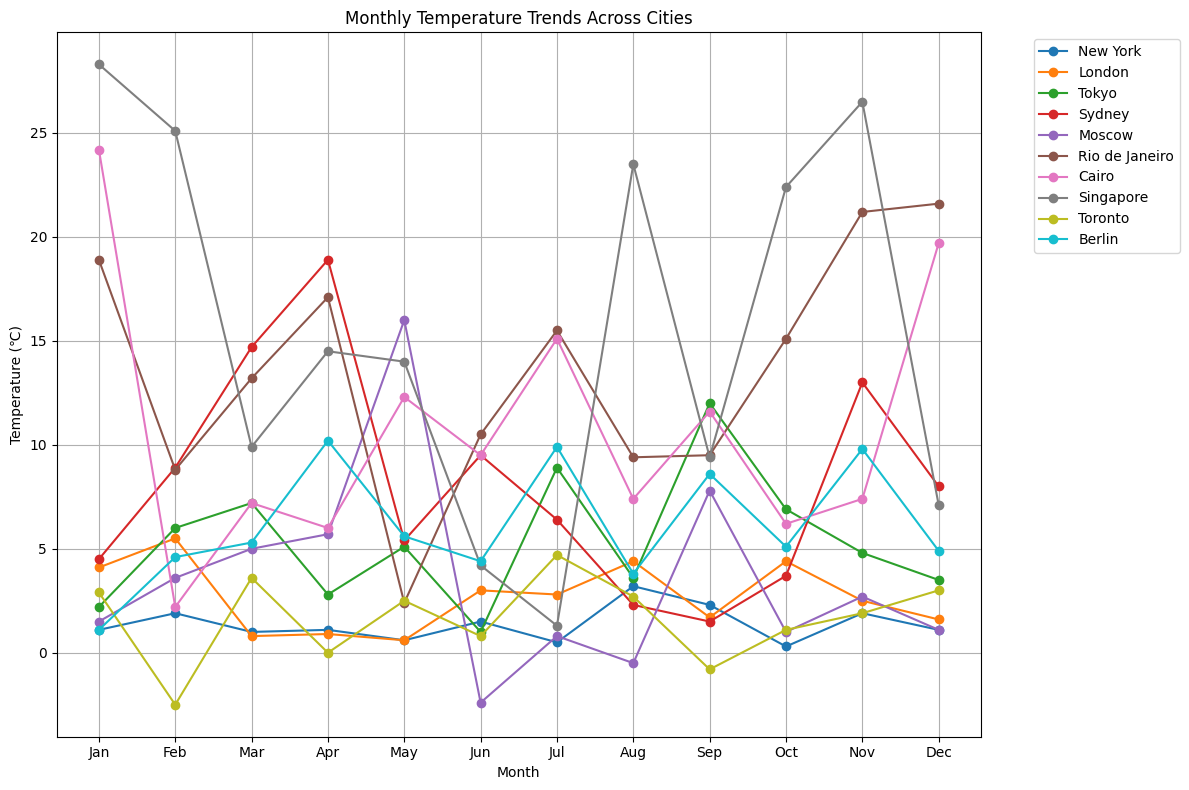

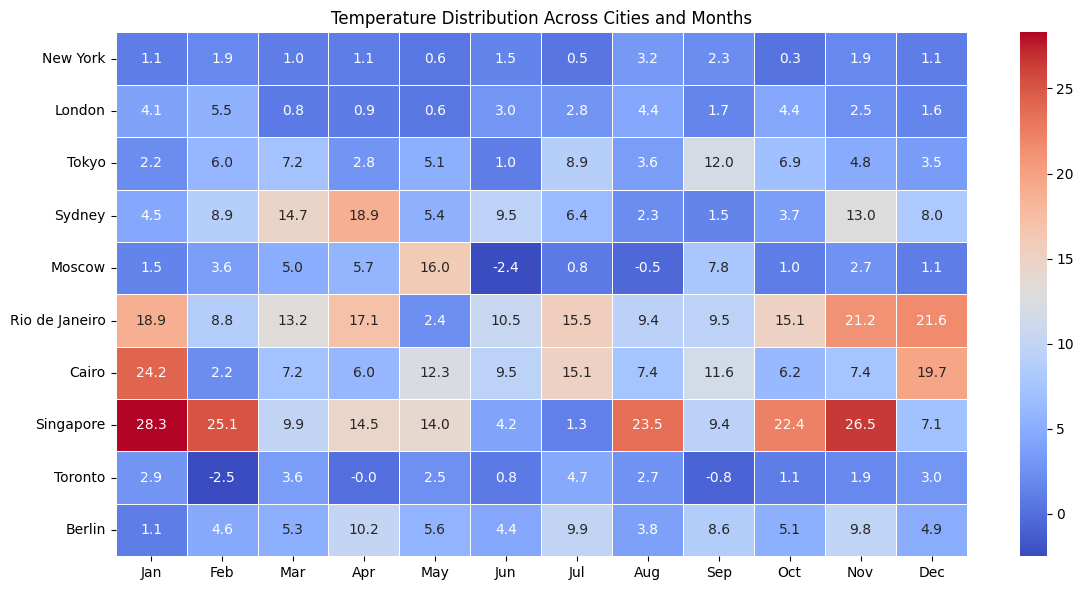

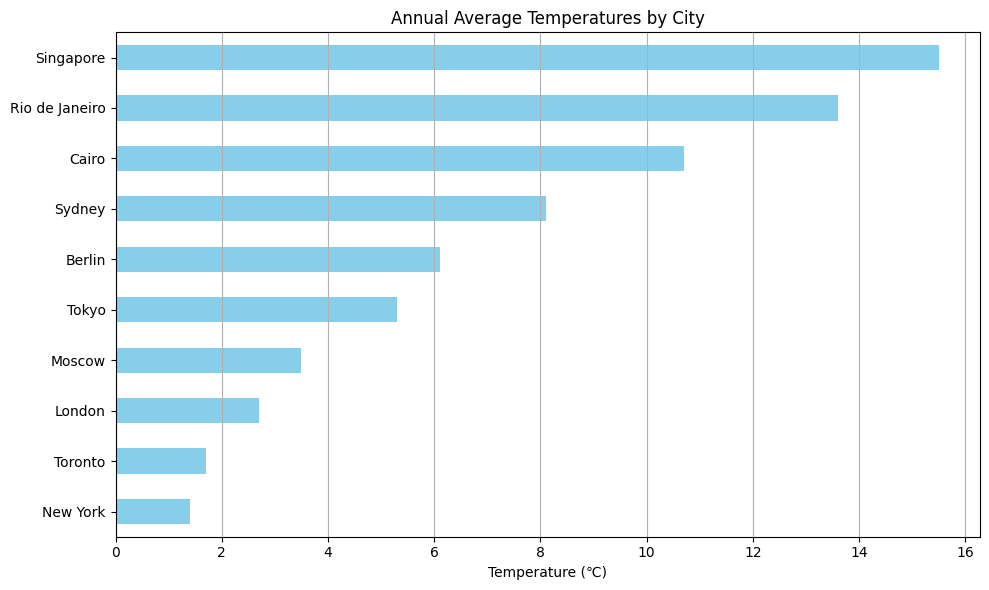


Analysis Findings Summary:
- The hottest city on average is Singapore with 15.5℃
- The coldest city on average is New York with 1.4℃
- Tropical cities like Rio de Janeiro and Singapore maintain consistently high temperatures year-round
- Cities in northern latitudes (Moscow, Toronto) show the greatest seasonal variation
- Southern hemisphere cities (Sydney) have opposite seasonal patterns to northern cities
- Equatorial cities show minimal temperature variation throughout the year


In [32]:
plt.figure(figsize=(12, 8))

# Plot all cities' monthly temperatures
for city in cities:
    plt.plot(months, temp_df.loc[city], marker='o', label=city)

plt.title('Monthly Temperature Trends Across Cities')
plt.xlabel('Month')
plt.ylabel('Temperature (℃)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Heatmap visualization
plt.figure(figsize=(12, 6))
sns.heatmap(temp_df, annot=True, cmap='coolwarm', fmt='.1f', linewidths=.5)
plt.title('Temperature Distribution Across Cities and Months')
plt.tight_layout()
plt.show()

# Bar plot of annual averages
plt.figure(figsize=(10, 6))
annual_avg.sort_values().plot(kind='barh', color='skyblue')
plt.title('Annual Average Temperatures by City')
plt.xlabel('Temperature (℃)')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

# 4. Findings Summary
print("\nAnalysis Findings Summary:")
print(f"- The hottest city on average is {hottest_city} with {annual_avg[hottest_city]}℃")
print(f"- The coldest city on average is {coldest_city} with {annual_avg[coldest_city]}℃")
print("- Tropical cities like Rio de Janeiro and Singapore maintain consistently high temperatures year-round")
print("- Cities in northern latitudes (Moscow, Toronto) show the greatest seasonal variation")
print("- Southern hemisphere cities (Sydney) have opposite seasonal patterns to northern cities")
print("- Equatorial cities show minimal temperature variation throughout the year")